In [15]:
#방법1
import pandas as pd
import matplotlib.pyplot as plt

file = "./data/GlobalLandTemperatures.xlsx"
data = pd.read_excel(file, index_col = 0)
print(data)

      Average Temperature  Average Temperature South Korea
Year                                                      
1850                11.31                             8.06
1860                11.31                             8.10
1870                11.58                             8.28
1880                11.30                             8.05
1890                11.77                             8.15
1900                11.52                             8.26
1910                11.48                             8.28
1920                11.67                             8.49
1930                11.86                             8.64
1940                11.81                             8.73
1950                12.10                             8.62
1960                12.10                             8.63
1970                12.18                             8.66
1980                12.07                             8.91
1990                12.77                             9.

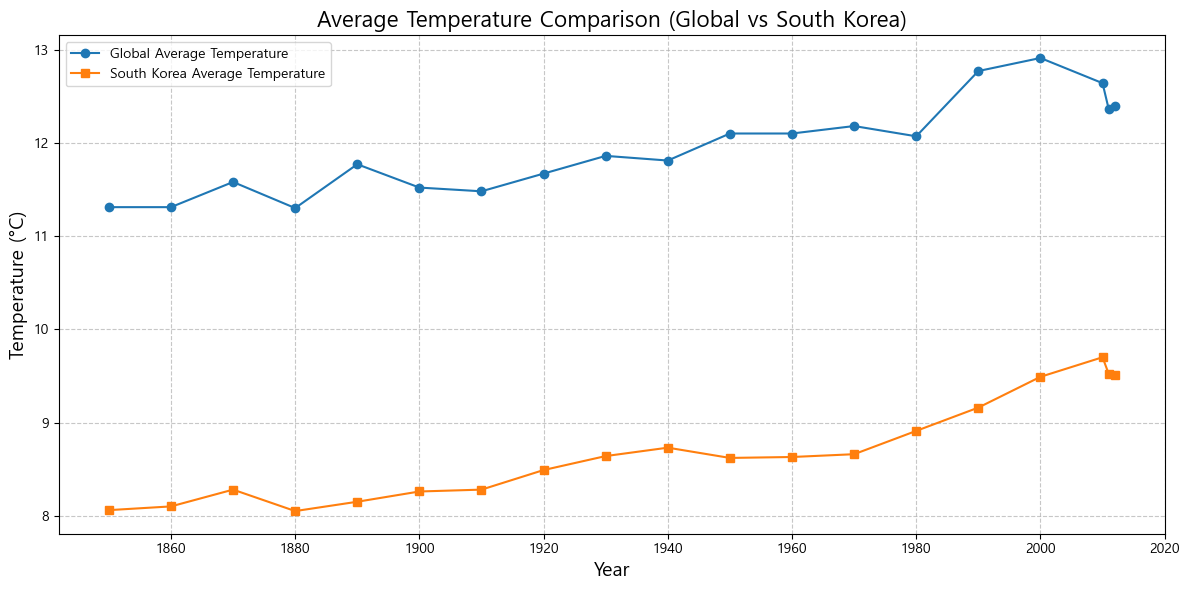

In [18]:
# 3. 연도별 평균 온도 계산
# 'Year', 'Average Temperature', 'Average Temperature South Korea' 컬럼이 있다고 가정
global_avg = data.groupby('Year')['Average Temperature'].mean()
korea_avg = data.groupby('Year')['Average Temperature South Korea'].mean()

# 4. 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(global_avg.index, global_avg, label='Global Average Temperature', marker='o')
plt.plot(korea_avg.index, korea_avg, label='South Korea Average Temperature', marker='s')

# 5. 그래프 꾸미기
plt.title('Average Temperature Comparison (Global vs South Korea)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 6. 그래프 출력
plt.show()

'''
왜이렇게 많이 차이나는가?
: 전지구 평균 온도는 북반구와 남반구의 모든 지역의 평균값을 포함하며, 해양과 육지의 온도도 모두 포함한다. 
해양의 온도 변화는 육지보다 느리고, 전지구 평균 온도를 낮추는 경향있다.
반면 우리나라 평균 온도는 작은 지역에서 측정된 값으로, 국지적인 요인(계절, 바람, 강수 등)이 크게 반영되기 때문
'''

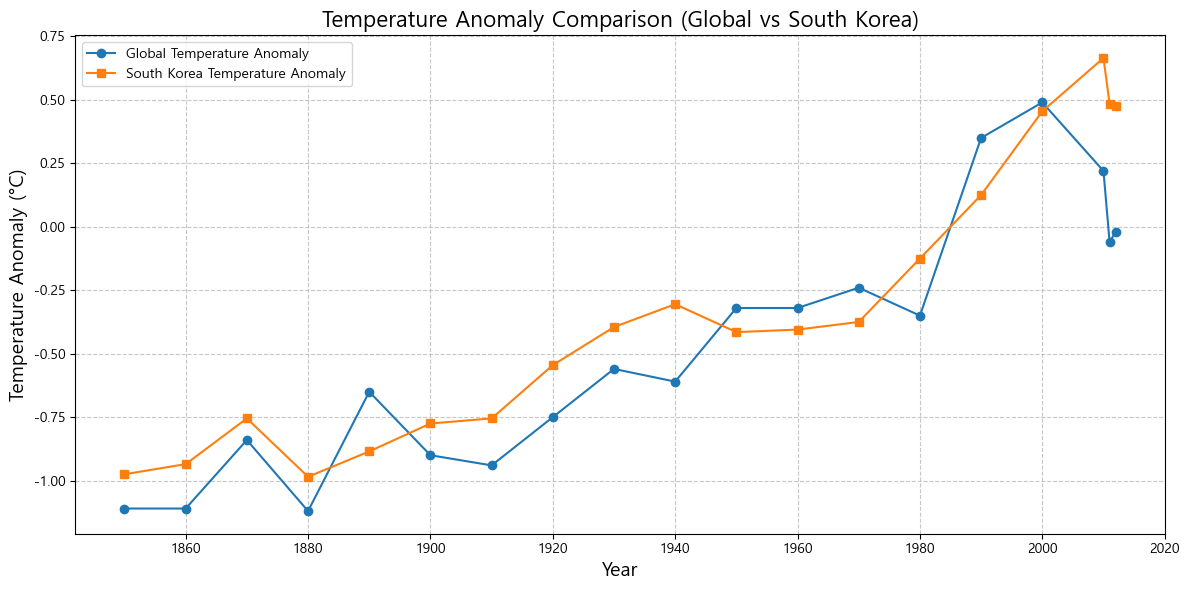

In [19]:
#ㄴ해결책: 방법2
'''
: 전지구와 우리나라 데이터를 절대온도 대신, 기준기간(1980~1990년)의 평균 온도를 기준으로 한 온도편차로 변환하여 비교. 
-> 더 의미있는 결과를 얻을 수 있음
'''
# 기준 기간 설정 (1980-1990년)
base_period_global = global_avg.loc[1980:1990].mean()
base_period_korea = korea_avg.loc[1980:1990].mean()

# 기준 기간 대비 온도 편차 계산
global_anomaly = global_avg - base_period_global
korea_anomaly = korea_avg - base_period_korea

# 온도 편차 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(global_anomaly.index, global_anomaly, label='Global Temperature Anomaly', marker='o')
plt.plot(korea_anomaly.index, korea_anomaly, label='South Korea Temperature Anomaly', marker='s')

plt.title('Temperature Anomaly Comparison (Global vs South Korea)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature Anomaly (°C)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()